<a href="https://colab.research.google.com/github/sw4050git/BallGameSample/blob/master/ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/MyDrive/検索技術/ex/

/content/drive/MyDrive/検索技術/ex


In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn import svm, metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
%matplotlib inline
 
np.random.seed(5)


In [ ]:
train_img_paths = []
train_labels=[]
for root,subdir,files in os.walk("./train_img/") :
    for s in subdir : 
      for r, d ,f in os.walk(root+s):
        for file in f:
          train_labels.append(os.path.join(r, file).split('/')[-2])
          train_img_paths.append(os.path.join(r, file))
print(train_img_paths)

['./train_img/s/C_101034010.png', './train_img/s/C_101024040.png', './train_img/s/C_101024030.png', './train_img/s/C_101014010.png', './train_img/s/C_101014030.png', './train_img/s/C_101014020.png', './train_img/s/C_101024020.png', './train_img/s/C_101024010.png', './train_img/s/C_101534010.png', './train_img/s/C_101524020.png', './train_img/s/C_101524010.png', './train_img/s/C_101514040.png', './train_img/s/C_101514030.png', './train_img/s/C_101414040.png', './train_img/s/C_101414030.png', './train_img/s/C_101424010.png', './train_img/s/C_101424020.png', './train_img/s/C_101514020.png', './train_img/s/C_101514010.png', './train_img/s/C_101414020.png', './train_img/s/C_101414010.png', './train_img/s/C_101334050.png', './train_img/s/C_101324030.png', './train_img/s/C_101334030.png', './train_img/s/C_101334040.png', './train_img/s/C_101324040.png', './train_img/s/C_101324020.png', './train_img/s/C_101334010.png', './train_img/s/C_101324050.png', './train_img/s/C_101324010.png', './train_

In [ ]:
test_img_paths = []
test_labels=[]
for root,subdir,files in os.walk("./test_img/") :
    for s in subdir : 
      for r, d ,f in os.walk(root+s):
        for file in f:
          test_labels.append(os.path.join(r, file).split('/')[-2])
          test_img_paths.append(os.path.join(r, file))
test_img_num = len(test_img_paths)
print(test_img_paths)

['./test_img/f/C_125011020.png', './test_img/f/C_125811030.png', './test_img/f/C_125711010.png', './test_img/f/C_125521010.png', './test_img/f/C_125221010.png', './test_img/f/C_125211030.png', './test_img/f/C_125131010.png', './test_img/f/C_125121010.png', './test_img/f/C_125111010.png', './test_img/f/C_125011010.png', './test_img/a/C_123733010.png', './test_img/a/C_123713010.png', './test_img/a/C_123723010.png', './test_img/a/C_124713010.png', './test_img/a/C_124733010.png', './test_img/a/C_125032010.png', './test_img/a/C_125733010.png', './test_img/a/C_125633010.png', './test_img/a/C_125723010.png', './test_img/a/C_125713010.png', './test_img/s/C_125514010.png', './test_img/s/C_125434010.png', './test_img/s/C_125214010.png', './test_img/s/C_125014010.png', './test_img/s/C_125814010.png', './test_img/s/C_125614010.png', './test_img/s/C_125414010.png', './test_img/s/C_125314020.png', './test_img/s/C_125134010.png', './test_img/s/C_125524010.png']


In [ ]:
def img_to_matrix(img):
    img_array = np.asarray(img)
    return img_array
def flatten_img(img_array):
    s = img_array.shape[0] * img_array.shape[1] * img_array.shape[2]
    img_width = img_array.reshape(1, s)
    return img_width[0]

train_dataset = []
for i in train_img_paths:
    img = Image.open(i)
    img = img.resize((int(1232/4), int(1754/4)), Image.BICUBIC)
    img = img_to_matrix(img)
    img = flatten_img(img)
    train_dataset.append(img)
train_dataset = np.array(train_dataset)
print(train_dataset.shape)

test_dataset = []
for i in test_img_paths:
    img = Image.open(i)
    img = img.resize((int(1232/4), int(1754/4)), Image.BICUBIC)
    img = img_to_matrix(img)
    img = flatten_img(img)
    test_dataset.append(img)
test_dataset = np.array(test_dataset)
print(test_dataset.shape)
print("Dataset make done.")

(150, 539616)
(30, 539616)
Dataset make done.


In [ ]:
# 次元数圧縮
n = train_dataset.shape[0]
print(n)
batch_size = 3
ipca = IncrementalPCA(n_components=batch_size-1)
for i in range(n//batch_size):
    train_r_dataset = ipca.partial_fit(train_dataset[i*batch_size:(i+1)*batch_size])

train_r_dataset = ipca.transform(train_dataset)
print(train_r_dataset.shape)

n = test_dataset.shape[0]
for i in range(n//batch_size):
    test_r_dataset = ipca.partial_fit(test_dataset[i*batch_size:(i+1)*batch_size])
test_r_dataset = ipca.transform(test_dataset)
print(test_r_dataset.shape)
print("PCA done.")

150
(150, 2)
(30, 2)
PCA done.


In [ ]:
clf = svm.SVC()
clf.fit(train_r_dataset,train_labels)

pred = clf.predict(test_r_dataset)

ac_score = metrics.accuracy_score(test_labels, pred)
cl_score = metrics.classification_report(test_labels, pred)
print('正解率：',ac_score)
print('レポート:')
print(cl_score)

正解率： 0.9666666666666667
レポート:
              precision    recall  f1-score   support

           a       1.00      0.90      0.95        10
           f       1.00      1.00      1.00        10
           s       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



(-29089.287607970782, 36237.07980205031)

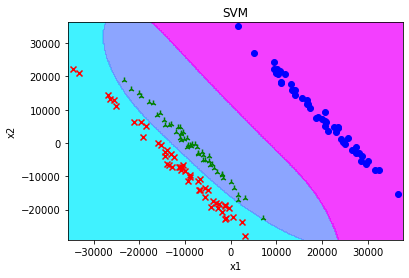

In [ ]:
x_min, x_max = train_r_dataset[:,0].min() - 1000, train_r_dataset[:,0].max() + 1000 # max & min with margin 1000
y_min, y_max = train_r_dataset[:,1].min() - 1000, train_r_dataset[:,1].max() + 1000 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

import matplotlib.cm as cm  # color m

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
for z in range(len(Z)):
  for i in range(len(Z[z])):
    if(Z[z][i]=='s'):
      Z[z][i]=1
    elif (Z[z][i]=='a'):
      Z[z][i]=2
    else:
      Z[z][i]=3
plt.contourf(xx, yy, Z, cmap = cm.cool, alpha= 0.8)

for i in range(len(train_labels)):
  if(train_labels[i]=='s'):
    plt.scatter(train_r_dataset[i,0], train_r_dataset[i, 1], marker='x',c="red")
  if(train_labels[i]=='a'):
    plt.scatter(train_r_dataset[i,0], train_r_dataset[i, 1], marker='2',c="green")
  if(train_labels[i]=='f'):
    plt.scatter(train_r_dataset[i,0], train_r_dataset[i, 1], marker='o',c="blue")

# Title and X-axis, Y-axis
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


(-27677.181912171367, 25409.888894814434)

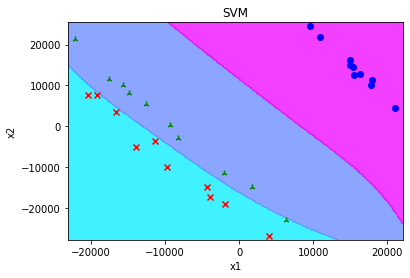

In [ ]:
x_min, x_max = test_r_dataset[:,0].min() - 1000, test_r_dataset[:,0].max() + 1000 # max & min with margin 1000
y_min, y_max = test_r_dataset[:,1].min() - 1000, test_r_dataset[:,1].max() + 1000 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
for z in range(len(Z)):
  for i in range(len(Z[z])):
    if(Z[z][i]=='s'):
      Z[z][i]=1
    elif (Z[z][i]=='a'):
      Z[z][i]=2
    else:
      Z[z][i]=3
plt.contourf(xx, yy, Z, cmap = cm.cool, alpha= 0.8)

for i in range(len(test_labels)):
  if(test_labels[i]=='s'):
    plt.scatter(test_r_dataset[i,0], test_r_dataset[i, 1], marker='x',c="red")
  if(test_labels[i]=='a'):
    plt.scatter(test_r_dataset[i,0], test_r_dataset[i, 1], marker='2',c="green")
  if(test_labels[i]=='f'):
    plt.scatter(test_r_dataset[i,0], test_r_dataset[i, 1], marker='o',c="blue")

# Title and X-axis, Y-axis
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())